# Welcome and Hello World

In this session, you are going to build a simple program using the Qiskit framework. This session does not cover everything in Qiskit, but only a small fraction. If you want to know more, go to the Qiskit documentation(The link is in the Useful links file).

# Installation and Setup

In this section, all needed modules will be installed. Run the cell below to install `qiskit`.

In [ ]:
### INSTALL QISKIT: Locally on a PC ###

!pip install qiskit[visualization]==1.0.2

In [ ]:
### INSTALL QISKIT: Locally on a Mac or Linux ###

!pip install 'qiskit[visualization]'==1.0.2

Even though these cells cover the majority of places you might be running this notebook, it's impossible to capture every possible scenario. Some of you may have gotten a warning asking you to use %pip instead of !pip - if that's the case, just make sure to make those changes for all future installs.

Now, let's test to make sure everything is working properly. We've provided some very basic Qiskit code for you in the following cell. This code will create a quantum circuit, apply a single gate, and then draw that circuit. Run the cell below to make sure your system is set up properly.

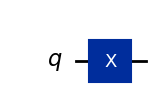

In [5]:
from qiskit import QuantumCircuit

# Create a new circuit with a single qubit
qc = QuantumCircuit(1)

# Add a Not gate to qubit 0
qc.x(0)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw("mpl")

You should see something similar to this as an output:

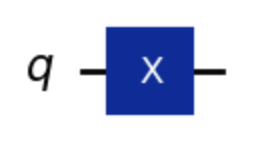

Did everything work as expected?

In [ ]:
!pip install qiskit_aer
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc
!pip install graphviz
!pip install prototype-zne

For the record, you'll probably see this error at the end of installs: `ERROR: pip's dependency resolver does not currently take into account all the packages that are installed.`

It is safe to ignore that particular error.

In [2]:
### CHECK QISKIT VERSION - TROUBLESHOOT. Expected = 1.0.2
import qiskit
qiskit.__version__

'1.0.2'

In [2]:
### CHECK OTHER DEPENDENCIES
!pip show pylatexenc matplotlib

Name: pylatexenc
Version: 2.10
Summary: Simple LaTeX parser providing latex-to-unicode and unicode-to-latex conversion
Home-page: https://github.com/phfaist/pylatexenc
Author: Philippe Faist
Author-email: philippe.faist@bluewin.ch
License: MIT
Location: C:\Users\AdikhanTuichiyev\anaconda3\Lib\site-packages
Requires: 
Required-by: 
---
Name: matplotlib
Version: 3.8.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: C:\Users\AdikhanTuichiyev\anaconda3\Lib\site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: seaborn


## Configuring an environment

Remember the API token from the Installation and Setup file? Yeah, you will need it here. Pass your token in place of `YourTokenGoesHere`. `overwrite` option is used if your account already exists.</br> 

In [3]:
# Save your API token
from qiskit_ibm_runtime import QiskitRuntimeService
QiskitRuntimeService.save_account(channel = 'ibm_quantum',
                                    overwrite=True,
                                    token = 'YourTokenGoesHere')

And finally, we will run all the required imports for the rest of the lab in the next cell, to keep things clean. In future labs, this will be done at the beginning of each notebook.

In [6]:
### Imports

from qiskit.quantum_info import SparsePauliOp, Pauli, Statevector, Operator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as EstimatorV2
from qiskit_aer.primitives import Estimator
from qiskit.primitives import StatevectorSampler
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Starting practice

## Drawing circuits
`QuantumCircuit()` from qiskit is used to create a circuit with specific number of qubits. </br>
`QuantumCircuit(1)` - creates a new circuit with a single qubit. `QuantumCircuit(n)` - creates a new circuit with `n` qubits.

There are many different operations that can be performed on qubits. Here, we will not explore all possible operations. For more information on these operations, please follow this link: [Native gates and operations](https://docs.quantum.ibm.com/run/native-gates).

### X Gate (Quantum NOT Gate) </br>
**Function**: The X gate, also known as the quantum NOT gate, flips the state of a qubit.

**Operation**:

- The X gate transforms the state |0⟩ into |1⟩ and vice versa.

**Matrix Representation**:

<div>
    \[
    X = \begin{pmatrix}
    0 & 1 \\
    1 & 0
    \end{pmatrix}
    \]
</div>

**Effect on Qubit States**:

- Applied to |0⟩:
  <div>\( X|0⟩ = |1⟩ \) </div>
- Applied to |1⟩:
  <div>\( X|1⟩ = |0⟩ \) </div>

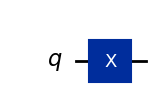

In [7]:
from qiskit import QuantumCircuit

# Create a new circuit with a single qubit
qc = QuantumCircuit(1)

# Add a Not gate to qubit 0
qc.x(0)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw("mpl")

### Controlled-X gate (CNOT)

**Function**: The CX (Controlled-X) gate, also known as the CNOT (Controlled-NOT) gate, applies an X (NOT) operation to the target qubit only when the control qubit is in the state |1⟩.

**Operation**:

- If the control qubit is in the state |0⟩, the target qubit remains unchanged.
- If the control qubit is in the state |1⟩, the CX gate applies an X (NOT) operation to the target qubit, flipping its state.

**Matrix Representation**:

<div>
    \[
    CX = \begin{pmatrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 1 \\
    0 & 0 & 1 & 0
    \end{pmatrix}
    \]
</div>

**Effect on Qubit States**:

- Applied to |00⟩:
  <div>\( CX|00⟩ = |00⟩ \) </div>
- Applied to |01⟩:
  <div>\( CX|01⟩ = |01⟩ \) </div>
- Applied to |10⟩:
  <div>\( CX|10⟩ = |11⟩ \) </div>
- Applied to |11⟩:
  <div>\( CX|11⟩ = |10⟩ \) </div>

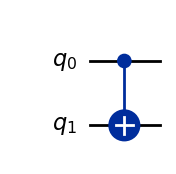

In [8]:
# creating a circuit with 2 qubits (CNOT can be used with 2 or more)

qc = QuantumCircuit(2)

# applying a CNOT gate. Qubit 0 controls Qubit 1.
qc.cx(0, 1)

qc.draw("mpl")

### Z Gate

**Function**: The Z gate, also known as the phase-flip gate, flips the phase of the |1⟩ state.

**Operation**:

- The Z gate leaves the |0⟩ state unchanged.
- The Z gate flips the phase of the |1⟩ state, changing its sign.

**Matrix Representation**:

<div>
    \[
    Z = \begin{pmatrix}
    1 & 0 \\
    0 & -1
    \end{pmatrix}
    \]
</div>

**Effect on Qubit States**:

- Applied to |0⟩:
  <div>\( Z|0⟩ = |0⟩ \) </div>
- Applied to |1⟩:
  <div>\( Z|1⟩ = -|1⟩ \) </div>

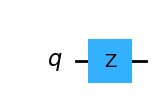

In [7]:
# Create a new circuit with a single qubit
qc = QuantumCircuit(1)

# Add a Not gate to qubit 0
qc.z(0)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw("mpl")

### T Gate

**Function**: The T gate, also known as the π/8 gate, applies a phase shift to the |1⟩ state.

**Operation**:

- The T gate applies a phase shift of π/4 (45 degrees) to the |1⟩ state, while leaving the |0⟩ state unchanged.

**Matrix Representation**:

<div>
    \[
    T = \begin{pmatrix}
    1 & 0 \\
    0 & e^{i\pi/4}
    \end{pmatrix}
    \]
</div>

**Effect on Qubit States**:

- Applied to |0⟩:
  <div>\( T|0⟩ = |0⟩ \) </div>
- Applied to |1⟩:
  <div>\( T|1⟩ = e^{i\pi/4}|1⟩ \) </div>


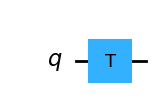

In [8]:
# Create a new circuit with a single qubit
qc = QuantumCircuit(1)

# Add a Not gate to qubit 0
qc.t(0)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw("mpl")

### Hadamard Gate

**Function**: The Hadamard gate (H gate) is a single-qubit quantum gate that creates a superposition state from a basis state.

**Operation**:

- The Hadamard gate transforms the basis states |0⟩ and |1⟩ into an equal superposition of both states.

**Matrix Representation**:

<div>
    \[
    H = \frac{1}{\sqrt{2}} \begin{pmatrix}
    1 & 1 \\
    1 & -1
    \end{pmatrix}
    \]
</div>

**Effect on Qubit States**:

- Applied to |0⟩:
  <div>\( H|0⟩ = \frac{1}{\sqrt{2}} (|0⟩ + |1⟩) \) </div>
- Applied to |1⟩:
  <div>\( H|1⟩ = \frac{1}{\sqrt{2}} (|0⟩ - |1⟩) \) </div>

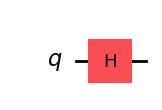

In [9]:
# Create a new circuit with a single qubit
qc = QuantumCircuit(1)

# Add a Not gate to qubit 0
qc.h(0)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw("mpl")

### Example from the presentation

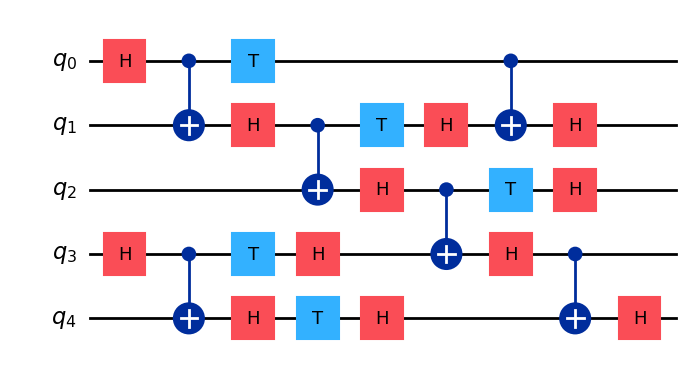

In [10]:
qc = QuantumCircuit(5)
qc.h(0)
qc.h(3)
qc.cx(0, 1)
qc.cx(3, 4)
qc.h([1, 4])
qc.t(0)
qc.cx(1, 2)
qc.t([3, 4])
qc.h([2, 3])
qc.cx(2, 3)
qc.t(1)
qc.h([1, 3, 4])
qc.cx(0, 1)
qc.t(2)
qc.cx(3, 4)
qc.h([1, 2, 4])
qc.draw("mpl")

In [11]:
qc.draw()

┌───┐     ┌───┐                              
q_0: ┤ H ├──■──┤ T ├─────────────────■────────────
     └───┘┌─┴─┐├───┤     ┌───┐┌───┐┌─┴─┐┌───┐     
q_1: ─────┤ X ├┤ H ├──■──┤ T ├┤ H ├┤ X ├┤ H ├─────
          └───┘└───┘┌─┴─┐├───┤└───┘├───┤├───┤     
q_2: ───────────────┤ X ├┤ H ├──■──┤ T ├┤ H ├─────
     ┌───┐     ┌───┐├───┤└───┘┌─┴─┐├───┤└───┘     
q_3: ┤ H ├──■──┤ T ├┤ H ├─────┤ X ├┤ H ├──■───────
     └───┘┌─┴─┐├───┤├───┤┌───┐└───┘└───┘┌─┴─┐┌───┐
q_4: ─────┤ X ├┤ H ├┤ T ├┤ H ├──────────┤ X ├┤ H ├
          └───┘└───┘└───┘└───┘          └───┘└───┘

In [18]:
ZIIII = Pauli('ZIIII')
IZIII = Pauli('IZIII')
IIZII = Pauli('IIZII')
IIIZI = Pauli('IIIZI')
IIIIZ = Pauli('IIIIZ')
observables = [ZIIII, IZIII, IIZII, IIIZI, IIIIZ]

## Optimizing our circuit

Before diving into the details about optimization, let's see some backends (quantum computers) that IBM provides.

You can find the available backends to work with on the [Compute Resources page](https://quantum.ibm.com/services/resources?tab=yours).

As you can see, the systems (backends) have different attributes and structures. This means that specific circuits might not be as efficient on some systems as we would like. This is where the transpiler comes in, optimizing the circuit to ensure it runs efficiently on the chosen backend. Transpilation is the process of taking a given input circuit and rewriting it to an equivalent circuit for a specific quantum device, and/or to optimize the circuit for execution on a real quantum system.

This is necessary because not all quantum devices work the same way. The instructions you send to one device might not be compatible with a different quantum backend. Transpilation operates in terms of a device's basis gate set, the topology of the quantum chips, timing constraints, and more which we will explore in this lab.

The goal of a transpiler is to get the best performance from noisy quantum hardware. Most circuits must undergo a series of transformations that make them compatible with a given target device, and optimize them to reduce the effects of noise on the resulting outcomes.

In this session we will work with AerSimulator. AerSimulator refers to a simulated backend that mimics the characteristics of a real IBM Quantum device. These fake backends are used for testing and development purposes without needing access to actual quantum hardware.are.

In [12]:
# run this cell
backend = AerSimulator()

### The six stages

Rewriting quantum circuits to match hardware constraints and optimizing for performance can be far from trivial. Qiskit provides users the standard six stages of compilation flows with four pre-built transpilation pipelines. By default, the preset pass managers are composed of six stages, with several options in each stages:

- `Init`: This pass runs any initial passes that are required before we start embedding the circuit to the system. This typically involves unrolling custom instructions and converting the circuit to all single- and two-qubit gates. (By default this will just validate the circuit instructions and translate multi-qubit gates into single- and two-qubit gates.)
  
- `Layout`: This stage applies a layout, mapping the virtual qubits in the circuit to the physical qubits on a backend.

- `Routing`: This stage runs after a layout has been applied and will inject gates (i.e. swaps) into the original circuit to make it compatible with the backend’s connectivity.
  
- `Translation`: This stage translates the gates in the circuit to the target backend’s basis set.
- `Optimization`: This stage runs the main optimization loop repeatedly until a condition (such as fixed depth) is reached.
- `Scheduling`: This stage is for any hardware-aware scheduling passes.


Qiskit also provides four pre-defined levels of transpilation that users can choose according to their needs. You can modify these preset pass managers, and in addition, you can construct a pass manager to build an entirely custom pipeline for transforming input circuits.

However, in this lab, we will not dive deep into this process as it has a loooot (by a loooot, I mean a loooooooooooooooot) of details.

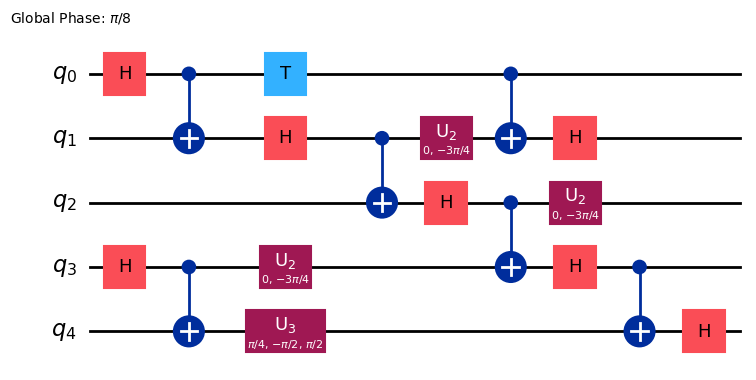

In [22]:
# Making a pass manager with our desired optimization level and backend
# possible values for optimization levels: 0, 1, 2, 3
# you can play around with optimization level and see how our circuit is changing
gppm = generate_preset_pass_manager(backend=backend, optimization_level=3)

# Run for our random circuit
optimized_circuit = gppm.run(qc)
optimized_circuit.draw('mpl', idle_wires=False, fold=60)

## Executing

In [23]:
estimator = Estimator()
job = estimator.run([optimized_circuit] * len(observables), observables)

### Visualization
The last step of Qiskit patterns is where we process, analyze, and visualize the results of our job.

[-0.04492188 -0.04296875 -0.015625    0.00195312 -0.03515625]


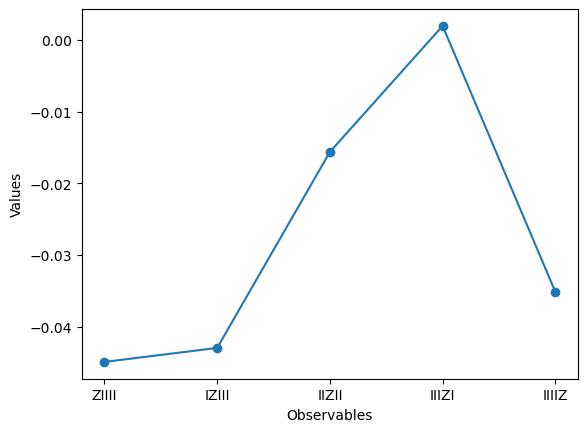

In [24]:
data = ['ZIIII', 'IZIII', 'IIZII', 'IIIZI', 'IIIIZ']
values = job.result().values
print(values)

container = plt.plot(data, values, '-o')

plt.xlabel('Observables')
plt.ylabel('Values')

plt.show()

## Measuring states

In [25]:
qc.measure_all()
sampler = StatevectorSampler()
pub = (qc, )
job_sampler = sampler.run([pub], shots=500)
result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'11011': 32, '01101': 23, '11101': 25, '01100': 32, '00111': 35, '10110': 30, '10001': 26, '10000': 27, '10100': 3, '01011': 26, '01010': 27, '11000': 6, '01110': 3, '11001': 6, '00100': 3, '11100': 25, '10010': 6, '11110': 9, '00110': 23, '11010': 29, '10101': 6, '10011': 3, '10111': 24, '00000': 17, '00001': 28, '00101': 5, '01001': 9, '00010': 3, '01111': 4, '01000': 3, '11111': 2}


### Visualizing our result from measuring

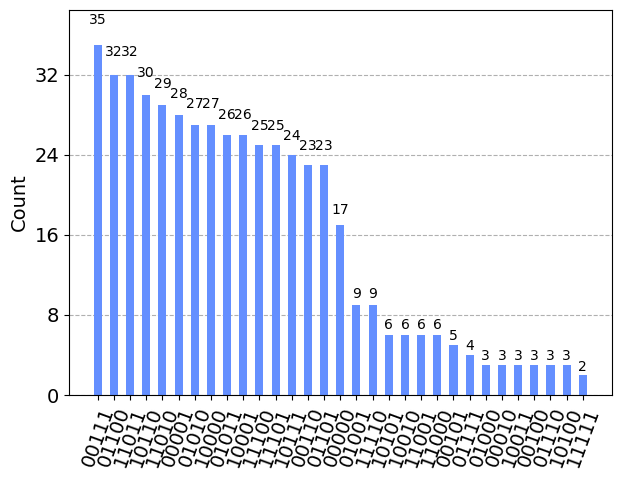

In [26]:
plot_histogram(counts_sampler, sort = 'value_desc')

# Using real backend (if you don't mind spending some time from your account)

If you want to try running on the real backend, be patient because it will take some time to run your job.

In [18]:
service = QiskitRuntimeService(channel = 'ibm_quantum')
backend = service.backend(name = 'ibm_brisbane')

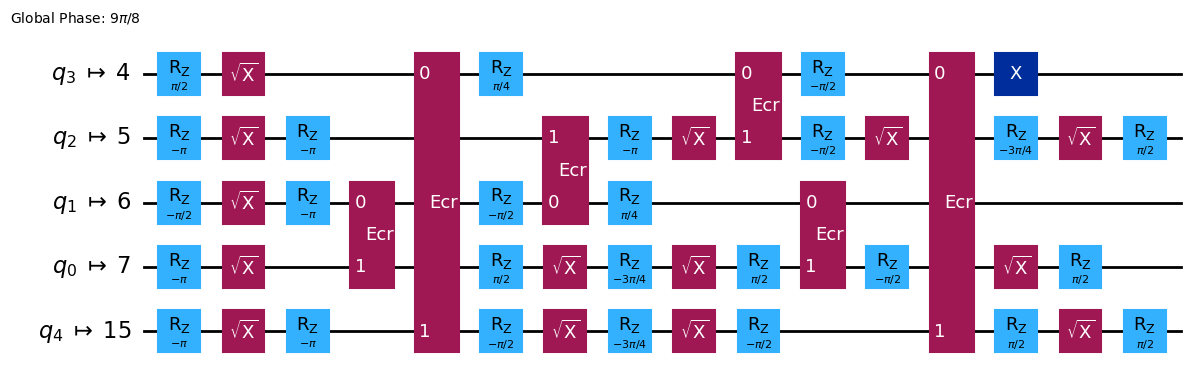

In [19]:
gppm = generate_preset_pass_manager(backend=backend, optimization_level=2)

# Run for our circuit
optimized_circuit = gppm.run(qc)
optimized_circuit.draw('mpl', idle_wires=False, fold=60)

In [22]:
estimator = EstimatorV2(backend = backend)
pauli_op = SparsePauliOp(['ZIIII', 'IZIII', 'IIZII', 'IIIZI', 'IIIIZ'])
observables = pauli_op.apply_layout(layout=optimized_circuit.layout)
pub = (optimized_circuit, observables)
job = estimator.run(pubs = [pub])

In [23]:
job.result()[0].data.evs

array(0.12953328)